<a href="https://colab.research.google.com/github/slightlyartistic/machine-learning/blob/main/Feature_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Work was done by myself for a machine learning assignment in grad school

# Evaluate using Cross Validation
from pandas import read_csv
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR


# read and load the csv data file
filename = "myClassDataSet2.csv"
data = read_csv(filename)

# Assign array of data values
array = data.values

# Separate array into input and output values
x = array[:,0:10]
y = array[:,10]

In [ ]:
# Define logistic regression model
logreg = LogisticRegression(solver='liblinear')

# Define cross-validation method
repkfold = RepeatedKFold(n_splits=10, n_repeats=3, random_state=4)

# Evaluate model using cross-validation
scores = cross_val_score(logreg, x, y, scoring='accuracy', cv=repkfold)

# Define mean classification accuracy
mca = scores.mean()

# Print mean classification accuracy
print('Mean Classification Accuracy:', mca)

Mean Classification Accuracy: 0.9409666666666666


In [ ]:
# Evaluate the model using cross-validation
accuracy_scores = cross_val_score(logreg, x, y, cv=repkfold, scoring='accuracy')
neg_log_loss_scores = cross_val_score(logreg, x, y, cv=repkfold, scoring='neg_log_loss')
roc_auc_scores = cross_val_score(logreg, x, y, cv=repkfold, scoring='roc_auc')

# Print the mean scores for each metric
print('Mean Accuracy:', accuracy_scores.mean())
print('Mean Neg Log Loss:', neg_log_loss_scores.mean())
print('Mean ROC AUC:', roc_auc_scores.mean())

Mean Accuracy: 0.9409666666666666
Mean Neg Log Loss: -0.196599171824069
Mean ROC AUC: 0.9675697584439447


In [ ]:
# Define models
lda = LinearDiscriminantAnalysis()
knn = KNeighborsClassifier()
gnb = GaussianNB()
svr = SVR()

# Define kfold cross-validation method
kfold = KFold(n_splits=10, shuffle=True, random_state=4)

logreg_scores = cross_val_score(logreg, x, y, cv=kfold)
lda_scores = cross_val_score(lda, x, y, cv=kfold)
knn_scores = cross_val_score(knn, x, y, cv=kfold)
gnb_scores = cross_val_score(gnb, x, y, cv=kfold)
svr_scores = cross_val_score(svr, x, y, cv=kfold)


print('LogReg Mean Score:', logreg_scores.mean())
print('LDA Mean Score:', lda_scores.mean())
print('KNN Mean Score:', knn_scores.mean())
print('GaussianNB Mean Score:', gnb_scores.mean())
print('SVR Mean Score:', svr_scores.mean())

LogReg Mean Score: 0.9409000000000001
LDA Mean Score: 0.9318000000000002
KNN Mean Score: 0.9353
GaussianNB Mean Score: 0.9418
SVR Mean Score: 0.7879733346813542


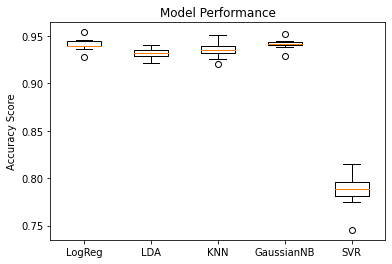

In [ ]:
# Import plotting library
import matplotlib.pyplot as plt

# Create a list of scores for each model
model_scores = [logreg_scores, lda_scores, knn_scores, gnb_scores, svr_scores]

# Create a box plot of the scores for each model
fig, ax = plt.subplots()
ax.boxplot(model_scores)
ax.set_xticklabels(['LogReg', 'LDA', 'KNN', 'GaussianNB', 'SVR'])
ax.set_ylabel('Accuracy Score')
ax.set_title('Model Performance')
plt.show()

# Display plot
plt.show()

In [ ]:
# Import additional libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest


In [ ]:
# Setup pipeline
estimators = []

# i. Standardize the data using StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# ii. Extract 3 features with PCA
features = []
features.append(( 'pca' , PCA(n_components=3)))

In [ ]:
# iii. Extract 6 features with SelectKBest
features.append(( 'select_best' , SelectKBest(k=6)))

In [ ]:
# iv. Combine PCA and KBest features
feature_union = FeatureUnion(features)
estimators.append(('Feature_Union', feature_union))

In [ ]:
# v. Learn Logistic Regression using LogisticRegression
estimators.append(( 'logreg' , logreg))

In [ ]:
# Evaluate pipeline
kfold2 = KFold(n_splits=10, random_state=5, shuffle=True)
models = Pipeline(estimators)
results = cross_val_score(models, x, y, cv=kfold2)
print(results.mean())

0.9411999999999999


In [ ]:
# Import additional libraries
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
# Set kfold
kfold3 = KFold(n_splits=10, random_state=7, shuffle=True)

# Set BaggingClassifier
bagclass = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,random_state=7)

In [ ]:
# Calculate mean classification accuracy
classification_accuracy = cross_val_score(bagclass, x, y, cv=kfold3, scoring='accuracy')

In [ ]:
# Print results
print('Mean Classification Accuracy:',classification_accuracy.mean())

Mean Classification Accuracy: 0.9494999999999999


In [ ]:
# Set adaboostclassifier
adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=30, random_state=7)
classification_accuracy = cross_val_score(adaboost, x, y, cv=kfold3, scoring='accuracy')

# Print results
print('Mean Classification Accuracy:',classification_accuracy.mean())

Mean Classification Accuracy: 0.9269000000000001


In [ ]:
# Set up Support Vector Machine
svm=SVC()

# Set up voting classifier
voteclass = VotingClassifier(estimators=[('lr', logreg), ('bc', bagclass), ('svc', svm)])
classification_accuracy = cross_val_score(voteclass, x, y, cv=kfold3, scoring='accuracy')

# Print results 
print('Mean Classification Accuracy:',classification_accuracy.mean())

Mean Classification Accuracy: 0.9469
